<a href="https://colab.research.google.com/github/AkhilVinayakp/HAR_LSTM_CNN/blob/main/lstm_cnn_mj_al.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
# lstm_cnn_model with wisdm int_norm.csv
# testing no. 1 
# passing windo

In [94]:
%cd /content/drive/My\ Drive/datasets 
%pwd

/content/drive/My Drive/datasets


'/content/drive/My Drive/datasets'

In [95]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [164]:

df =  pd.read_csv('int_norm.csv')

In [165]:
df.shape

(1098204, 6)

In [166]:
# creating windowed dataset
# data windowing function test case passed
def create_windowed_dataset(series, window_size,shift_size, batch_size,shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size , shift = shift_size, drop_remainder = True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:,1:],window[window_size - 1,0]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [167]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.054655,0.997718,0.039652
1,33,Jogging,49106062271000,0.405338,0.910910,0.077102
2,33,Jogging,49106112167000,0.410782,0.911708,-0.006846
3,33,Jogging,49106222305000,-0.032685,0.986373,0.161248
4,33,Jogging,49106332290000,-0.083804,0.856341,0.509566


In [168]:
df.drop('timestamp', axis = 1, inplace=True)

In [169]:
# /// added : one hot encoding before spliting

df['activity'] = df['activity'].astype("category")
df['activity'] = df.activity.cat.codes

In [162]:
#  keep the codes encode in the windowing function

In [163]:
# labels

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
# now for windowing purpose making the labels as part of 

In [170]:
train = df[df['user'] < 31 ]

In [171]:
test = df[df['user'] > 30]

In [172]:
print(train.shape)
print(test.shape)

(898361, 5)
(199843, 5)


In [173]:
train.head()

,user,activity,x-axis,y-axis,z-axis
8489,17,5,0.058149,0.996847,-0.053996
8490,17,5,-0.000000,0.998427,-0.056061
8491,17,5,-0.023448,0.997247,-0.070345
8492,17,5,0.014845,0.998642,-0.049932
8493,17,5,0.014737,0.998072,-0.060286


In [174]:
train.drop('user', axis = 1, inplace=True)
test.drop('user', axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [175]:
train.reset_index(drop = True, inplace = True)

In [176]:
train.head()

,activity,x-axis,y-axis,z-axis
0,5,0.058149,0.996847,-0.053996
1,5,-0.000000,0.998427,-0.056061
2,5,-0.023448,0.997247,-0.070345
3,5,0.014845,0.998642,-0.049932
4,5,0.014737,0.998072,-0.060286


In [177]:
train.reset_index(drop = True, inplace = True)
train.head()

,activity,x-axis,y-axis,z-axis
0,5,0.058149,0.996847,-0.053996
1,5,-0.000000,0.998427,-0.056061
2,5,-0.023448,0.997247,-0.070345
3,5,0.014845,0.998642,-0.049932
4,5,0.014737,0.998072,-0.060286


In [146]:
# enoding the labels of the data to categorical
from tensorflow.keras.utils import  to_categorical

In [147]:
df.dtypes

user          int64
activity     object
x-axis      float64
y-axis      float64
z-axis      float64
dtype: object

In [148]:
df['activity'] = df['activity'].astype("category")

In [149]:
# from sklearn.preprocessing import OneHotEncoder
# train['activity']= OneHotEncoder().fit_transform(train['activity'].values.reshape(-1,1))

In [150]:
train['activity']

0         Walking
1         Walking
2         Walking
3         Walking
4         Walking
           ...   
898356    Sitting
898357    Sitting
898358    Sitting
898359    Sitting
898360    Sitting
Name: activity, Length: 898361, dtype: object

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# train_target = train['activity'].values

In [ ]:
# type(train_target)

numpy.ndarray

In [ ]:
# enc = LabelEncoder()
# enc_train_target = enc.fit_transform(train_target)

In [ ]:
# np.unique(enc_train_target)

array([0, 1, 2, 3, 4, 5])

In [151]:
# converting to codes
train['activity'] = train['activity'].astype("category")
train.activity = train.activity.cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [129]:
train.head()

,activity,x-axis,y-axis,z-axis
0,5,0.058149,0.996847,-0.053996
1,5,-0.000000,0.998427,-0.056061
2,5,-0.023448,0.997247,-0.070345
3,5,0.014845,0.998642,-0.049932
4,5,0.014737,0.998072,-0.060286


In [130]:
train.dtypes

activity       int8
x-axis      float64
y-axis      float64
z-axis      float64
dtype: object

In [152]:
labels = to_categorical(train['activity'].values,num_classes=6, dtype='float32')

In [153]:
labels

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [154]:
type(labels)

numpy.ndarray

In [132]:
train.head()

,activity,x-axis,y-axis,z-axis
0,0.0,0.058149,0.996847,-0.053996
1,0.0,-0.000000,0.998427,-0.056061
2,0.0,-0.023448,0.997247,-0.070345
3,0.0,0.014845,0.998642,-0.049932
4,0.0,0.014737,0.998072,-0.060286


In [ ]:
train.tail()

,activity,x-axis,y-axis,z-axis
898356,1.0,0.968689,-0.168982,0.181898
898357,1.0,0.970048,-0.156667,0.185640
898358,1.0,0.972323,-0.147776,0.180972
898359,1.0,0.969793,-0.157322,0.186416
898360,1.0,0.973444,-0.145797,0.176492


In [178]:
train.activity.unique()

array([5, 1, 4, 0, 2, 3], dtype=int8)

In [ ]:
t = tf.Variable(np.arange(2,21))

In [ ]:
t.dtype

tf.int64

In [ ]:
t

<tf.Variable 'Variable:0' shape=(19,) dtype=int64, numpy=
array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])>

In [ ]:
m = to_categorical(t.numpy())

In [ ]:
m

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0.,

In [97]:
###########################################################################################################################################

# data windowing isolated windowing of features and labels required



###########################################################################################################################################

In [98]:
# Testing for visualizations
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.054655,0.997718,0.039652
1,33,Jogging,49106062271000,0.405338,0.910910,0.077102
2,33,Jogging,49106112167000,0.410782,0.911708,-0.006846
3,33,Jogging,49106222305000,-0.032685,0.986373,0.161248
4,33,Jogging,49106332290000,-0.083804,0.856341,0.509566


In [100]:
f = df[['activity','x-axis','y-axis','z-axis']]

In [101]:
import seaborn as sns

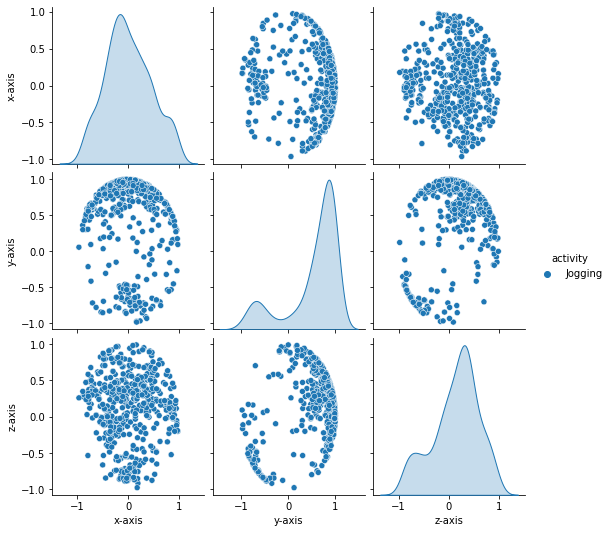

In [104]:
sns.pairplot(f[:500], hue='activity')

In [106]:
df['activity'].value_counts()

Walking       424398
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: activity, dtype: int64

<BarContainer object of 6 artists>

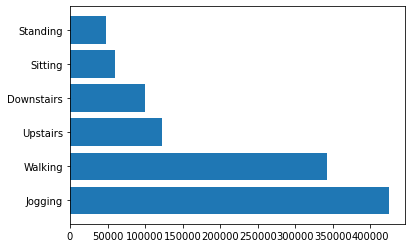

In [111]:
plt.barh(df['activity'].unique(),df['activity'].value_counts())